In [2]:
import os
os.chdir('/rds/general/user/ma11115/home/pl_temp_fit/') 

Running on PyMC v5.10.3
Running test number 0
{'num_samples': 50, 'num_tune': 50, 'sigma': 0.01, 'temperature_list': array([300., 150.,  80.]), 'number_free_parameters': 2, 'Temp_std_err': 5, 'hws_std_err': 0.001, 'relative_intensity_std_error': 0.01}
25
{'number_free_parameters': 2, 'E': {'min': 1.0, 'max': 1.5}, 'k_EXCT': {'min': 8, 'max': 12}, 'fosc_CT': {'min': -2.4, 'max': -2.2}, 'LI': {'mu': 0.12, 'sigma': 0.01, 'lower': 0.05, 'upper': 0.15}, 'L0': {'mu': 0.12, 'sigma': 0.01, 'lower': 0.05, 'upper': 0.15}, 'H0': {'mu': 0.15, 'sigma': 0.01, 'lower': 0.12, 'upper': 0.18}, 'Temp_std_err': 5, 'hws_std_err': 0.001, 'relative_intensity_std_error': 0.01, 'sigma': 0.01}
{'draws': 10, 'tune': 5, 'chains': 3, 'step': 'DEMetropolis(scaling=[0.1,1])', 'return_inferencedata': True}
{'draws': 50, 'tune': 50, 'chains': 4, 'return_inferencedata': True, 'progressbar': True, 'random_seed': None}


Only 50 samples in chain.
Population sampling (4 chains)
DEMetropolis: [E, k_EXCT]
Attempting to parallelize chains to all cores. You can turn this off with `pm.sample(cores=1)`.


/rds/general/user/ma11115/home/pl_temp_fit/src/pl_temp_fit/Sampler.py:214: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/rds/general/user/ma11115/home/pl_temp_fit/src/pl_temp_fit/Sampler.py:214: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/rds/general/user/ma11115/home/pl_temp_fit/src/pl_temp_fit/Sampler.py:214: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
/rds/general/user/ma11115/home/pl_temp_fit/src/pl_temp_fit/Sampler.py:214: RuntimeWarning: overflow encountered in exp
  "accept": np.exp(accept),
Sampling 4 chains for 50 tune and 50 draw iterations (200 + 200 draws total) took 42 seconds.
The number of samples is too small to check convergence reliably.
/rds/general/user/ma11115/home/pl_temp_fit/src/pl_temp_fit/ELPYMCModel.py:193: UserWarning: The effect of Potentials on other parameters is ignored during prior predictive sampling. This is likely to lead to invalid or biased predictive samples.
  idat

         mean     sd  hdi_3%  hdi_97%  mcse_mean  mcse_sd  ess_bulk  ess_tail  \
E       1.402  0.028   1.356    1.429      0.012    0.009       6.0       5.0   
k_EXCT  8.931  1.353   8.000   12.000      0.587    0.443       6.0      11.0   

        r_hat  
E        2.06  
k_EXCT   3.00  


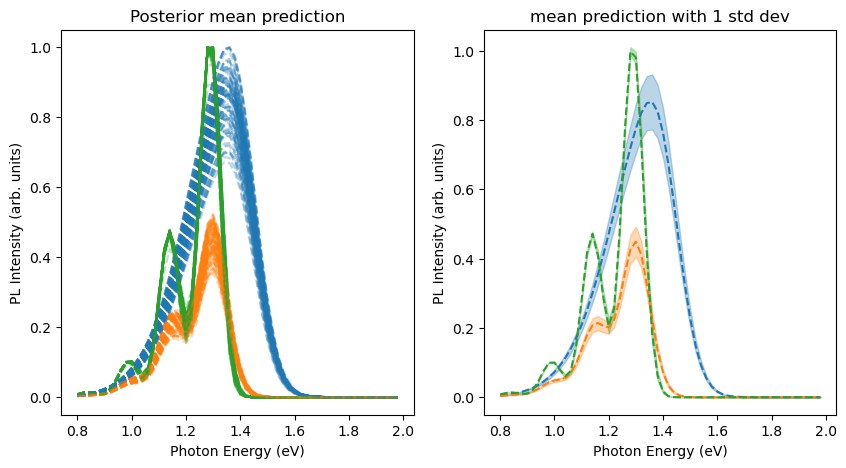

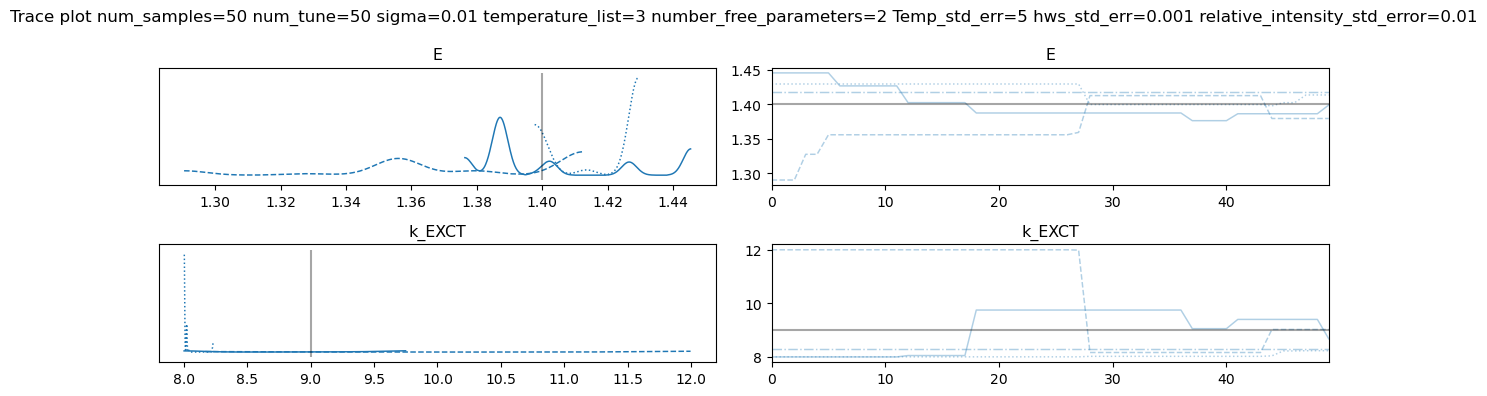

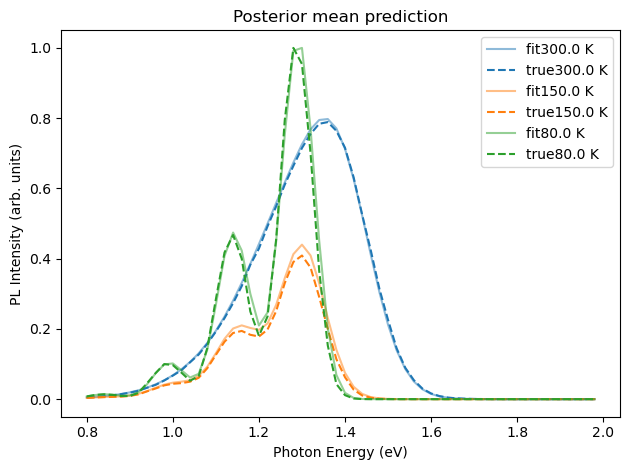

In [3]:
import importlib
#importlib.reload(PLPYMCModel)
#importlib.reload(ELPYMCModel)

#%run src/pl_temp_fit/test_FIT_NEW.py --test_number 0
%run src/pl_temp_fit/test_el_fit.py --test_number 0

In [9]:
script="#!/bin/bash \n"+\
    "#PBS -l walltime=07:59:01 \n"+\
    "#PBS -l select=1:ncpus=16:mem=4gb:avx=true \n"+\
    f"#PBS -J 1-{24} \n"+\
    " \n"+\
    "cd /rds/general/user/ma11115/home/pl_temp_fit/ \n"+\
    "module load anaconda3/personal \n"+ \
    "source activate pymc_env     \n"+\
    f"python src/pl_temp_fit/test_el_fit.py --test_number ${'PBS_ARRAY_INDEX'} \n"
#print(script) 
with open(f'HPC_bash_script/Runtest_el.sh', 'wb') as f:
    f.write( bytes(script, 'utf-8'))  

!qsub  -e ./cache -o ./cache HPC_bash_script/Runtest_el.sh

/bin/bash: which: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `which'
/bin/bash: module: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `module'
/bin/bash: scl: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `scl'
/bin/bash: ml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `ml'
/bin/sh: which: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `which'
/bin/sh: ml: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `ml'
/bin/sh: scl: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `scl'
/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `module'
sh: which: line 1: syntax error: unexpected end of file


In [8]:
script="#!/bin/bash \n"+\
    "#PBS -l walltime=07:59:01 \n"+\
    "#PBS -l select=1:ncpus=16:mem=4gb:avx=true \n"+\
    f"#PBS -J 1-{24} \n"+\
    " \n"+\
    "cd /rds/general/user/ma11115/home/pl_temp_fit/ \n"+\
    "module load anaconda3/personal \n"+ \
    "source activate pymc_env     \n"+\
    f"python src/pl_temp_fit/test_FIT_NEW.py --test_number ${'PBS_ARRAY_INDEX'} \n"
#print(script) 
with open(f'HPC_bash_script/Runtest_pl.sh', 'wb') as f:
    f.write( bytes(script, 'utf-8'))  

!qsub  -e ./cache -o ./cache HPC_bash_script/Runtest_pl.sh

/bin/bash: which: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `which'
/bin/bash: module: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `module'
/bin/bash: scl: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `scl'
/bin/bash: ml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `ml'
/bin/sh: which: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `which'
/bin/sh: ml: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `ml'
/bin/sh: scl: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `scl'
/bin/sh: module: line 1: syntax error: unexpected end of file
/bin/sh: error importing function definition for `module'
sh: which: line 1: syntax error: unexpected end of file
